# Phys 427 Lab 2

In [1]:
import numpy as np
import matplotlib.pyplot as plot

## Mathematical Method

#### We currently wish to prove that if our background axes are independant, then the ABCD method is valid. That is to say that if $f(x, y) = f_1(x)*f_2(x)$ then the ABCD method is valid. The ABCD method says that the ratios of the number of bins B & D and A & C are equal.

#### $$ \frac{N_B}{N_D} = \frac{N_A}{N_C} $$

#### Here N_n is the number of counts in bin n. If the x and y components are independant then we have

#### $$ N_B = \sum f_1(x<a)f_2(y<b) $$
#### $$ N_D = \sum f_1(x<a)f_2(y>b) $$
#### $$ N_A = \sum f_1(x>a)f_2(y>b) $$
#### $$ N_C = \sum f_1(x>a)f_2(y<b) $$

#### Now taking our ratios we get

#### $$ \frac{N_B}{N_D} = \frac{\sum f_1(x<a)f_2(y>b)}{\sum f_1(x<a)f_2(y<b)} $$
#### $$ \frac{N_A}{N_C} = \frac{\sum f_1(x>a)f_2(y>b)}{\sum f_1(x>a)f_2(y<b)} $$

#### As you can see, the sums of the x components cancel leaving us with the ratios of the sums of the y components, thus giving us an equality.

### $$ \frac{\sum f_2(y>b)}{\sum f_2(y<b)} = \frac{\sum f_2(y>b)}{\sum f_2(y<b)} $$

#### This equality holds true so from this we can gather that the ABCD method really is valid as long as the x and y components are independant of each other.

In [2]:
xrand = np.random.uniform(low = 0, high = 1, size = 1000)
yrand = np.random.uniform(low = 0, high = 1, size = 1000)
#generates our uniform distribution

a = np.full(100, 0.6) #creates an array of size 100, and value 0.6
b = np.linspace(0, 1, 100) #creates an array of size 100, from 0 to 1

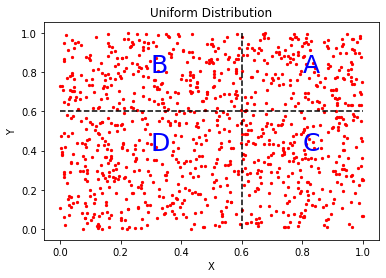

In [3]:
plot.figure()
plot.scatter(xrand, yrand, s = 5, color = 'r')
#plots our uniform distribution

plot.plot(a, b, 'k--')
plot.plot(b, a, 'k--')
#plots our bins with black dashed lines

plot.text(0.3, 0.8, 'B', fontsize = 25, color = 'b')
plot.text(0.3, 0.4, 'D', fontsize = 25, color = 'b')
plot.text(0.8, 0.8, 'A', fontsize = 25, color = 'b')
plot.text(0.8, 0.4, 'C', fontsize = 25, color = 'b')
#creates a text at X, Y positions with specified fontsize and color
plot.title('Uniform Distribution')
plot.xlabel('X')
plot.ylabel('Y')
plot.show()

### Above is our uniform distribution plot; next we will attempt to prove that the number of counts in our bins follows the ABCD method $(\frac{N_B}{N_D} = \frac{N_A}{N_C})$

In [4]:
Bin_A = np.where((xrand > 0.6) & (yrand > 0.6))
Bin_B = np.where((xrand < 0.6) & (yrand > 0.6))
Bin_C = np.where((xrand > 0.6) & (yrand < 0.6))
Bin_D = np.where((xrand < 0.6) & (yrand < 0.6))

#Creates bins of data specified by x and y delimeters

B = np.count_nonzero(Bin_B)
C = np.count_nonzero(Bin_C)
D = np.count_nonzero(Bin_D)

#counts the number of data points within our bins

A_extrap = (B*C)/D #prediction of A using ABCD method


A = np.count_nonzero(Bin_A) #actual count of A

Error = np.absolute(A - A_extrap) #difference in predicted and actual
print(Error)

2.841642228739005


### Above is our sample of one run. As you can see our error is quite small giving the method some validation. Next we wish to run this code 1000 times over, testing different sample sizes of plotted points(10, 100, 1000, 5000). Afterwards we will plot the errors of each sample size.

In [468]:
a = 1000 #controls size of sample

Y = np.zeros((1000, a))
for i in range(1000):
    Y[i] = np.random.uniform(low = 0, high = 1, size = a)
#creates a matrix of size a x a with each row containing our array of random uniform numbers between 0 & 1

X = np.zeros((1000,a))
for i in range(1000):
    X[i] = np.random.uniform(low = 0, high = 1, size = a)
#creates a matrix of size a x a with each row containing our array of random uniform numbers between 0  & 1

In [469]:
def A(): #generator function for bin A
    for i in range(1000): #starts iteration with with an iteration size of a
        Bin_A = np.where((X[i] > 0.6) & (Y[i] > 0.6)) #specifies the bin for sample i. In each row it =>
        #filters all values less than 0.6
        yield np.count_nonzero(Bin_A) #counts the number of points in bin A for row i

#A1 = list(A()) #runs our generator 1000 times and puts the outputs into an array
#print(A1) #here I was testing to see if the code worked

#generator function for bin value A

In [470]:
def B():
    for i in range(1000):
        Bin_B = np.where((X[i] < 0.6) & (Y[i] > 0.6))
        yield np.count_nonzero(Bin_B)

# generator function for bin value B

In [471]:
def C():
    for i in range(1000):
        Bin_C = np.where((X[i] > 0.6) & (Y[i] < 0.6))
        yield np.count_nonzero(Bin_C)

# generator function for bin value C

In [472]:
def D():
    for i in range(1000):
        Bin_D = np.where((X[i] < 0.6) & (Y[i] < 0.6))
        yield np.count_nonzero(Bin_D)

# generator function for bin value D

In [473]:
A1 = list(A())
B1 = list(B())
C1 = list(C())
D1 = list(D())

#creates arrays of our bin counts

In [474]:
A_extrap1 = []

for i in range(1000):
    A_extrap1.append((B1[i]*C1[i])/D1[i])

# this is the predicted value of A given from each component in lists B, C and D

In [475]:
Error1 = []

for i in range(1000):
    Error1.append(A1[i] - A_extrap1[i])

# this is the difference between the actual value of counts in bin 1 and the predicted counts.
# our error values are organize in an array.

### Above is our sample size of 1000. Next we will use a sample size of 100.

In [476]:
a = 100 #controls size of sample

Y = np.zeros((1000, a))
for i in range(1000):
    Y[i] = np.random.uniform(low = 0, high = 1, size = a)
#creates a matrix of size a x a with each row containing our array of random uniform numbers between 0 & 1

X = np.zeros((1000,a))
for i in range(1000):
    X[i] = np.random.uniform(low = 0, high = 1, size = a)
#creates a matrix of size a x a with each row containing our array of random uniform numbers between 0  & 1

In [477]:
A2 = list(A())
B2 = list(B())
C2 = list(C())
D2 = list(D())

In [478]:
A_extrap2 = []

for i in range(1000):
    A_extrap2.append((B2[i]*C2[i])/D2[i])

In [479]:
Error2 = []

for i in range(1000):
    Error2.append(A2[i] - A_extrap2[i])

### Next will be a sample size of 5000

In [480]:
a = 5000 #controls size of sample

Y = np.zeros((1000, a))
for i in range(1000):
    Y[i] = np.random.uniform(low = 0, high = 1, size = a)
#creates a matrix of size a x a with each row containing our array of random uniform numbers between 0 & 1

X = np.zeros((1000,a))
for i in range(1000):
    X[i] = np.random.uniform(low = 0, high = 1, size = a)
#creates a matrix of size a x a with each row containing our array of random uniform numbers between 0  & 1

In [481]:
A3 = list(A())
B3 = list(B())
C3 = list(C())
D3 = list(D())

In [482]:
A_extrap3 = []

for i in range(1000):
    A_extrap3.append((B3[i]*C3[i])/D3[i])

In [483]:
Error3 = []

for i in range(1000):
    Error3.append(A3[i] - A_extrap3[i])

### Next, we will attempt to run a sample size of 10; however, given that our sample size is so small, it is very possible that we will not have points within one of our bins. Because of this there is a chance that we will divide by zero for our predicted value and get an error.

In [484]:
a = 10 #controls size of sample

Y = np.zeros((1000, a))
for i in range(1000):
    Y[i] = np.random.uniform(low = 0, high = 1, size = a)
#creates a matrix of size a x a with each row containing our array of random uniform numbers between 0 & 1

X = np.zeros((1000,a))
for i in range(1000):
    X[i] = np.random.uniform(low = 0, high = 1, size = a)
#creates a matrix of size a x a with each row containing our array of random uniform numbers between 0  & 1

In [485]:
A4 = list(A())
B4 = list(B())
C4 = list(C())
D4 = list(D())

In [486]:
A_extrap4 = []

for i in range(1000):
    A_extrap4.append((B4[i]*C4[i])/D4[i])

ZeroDivisionError: division by zero

In [487]:
Error4 = []

for i in range(1000):
    Error4.append(A4[i] - A_extrap4[i])

IndexError: list index out of range

### Next we'll run a sample size of 10000

In [488]:
a = 10000 #controls size of sample

Y = np.zeros((1000, a))
for i in range(1000):
    Y[i] = np.random.uniform(low = 0, high = 1, size = a)
#creates a matrix of size a x a with each row containing our array of random uniform numbers between 0 & 1

X = np.zeros((1000,a))
for i in range(1000):
    X[i] = np.random.uniform(low = 0, high = 1, size = a)
#creates a matrix of size a x a with each row containing our array of random uniform numbers between 0  & 1

In [489]:
A5 = list(A())
B5 = list(B())
C5 = list(C())
D5 = list(D())

In [490]:
A_extrap5 = []

for i in range(1000):
    A_extrap5.append((B5[i]*C5[i])/D5[i])

In [491]:
Error5 = []

for i in range(1000):
    Error5.append(A5[i] - A_extrap5[i])

### Nexta sample size of 50000

In [492]:
a = 50000 #controls size of sample

Y = np.zeros((1000, a))
for i in range(1000):
    Y[i] = np.random.uniform(low = 0, high = 1, size = a)
#creates a matrix of size a x a with each row containing our array of random uniform numbers between 0 & 1

X = np.zeros((1000,a))
for i in range(1000):
    X[i] = np.random.uniform(low = 0, high = 1, size = a)
#creates a matrix of size a x a with each row containing our array of random uniform numbers between 0  & 1

In [493]:
A6 = list(A())
B6 = list(B())
C6 = list(C())
D6 = list(D())

In [494]:
A_extrap6 = []

for i in range(1000):
    A_extrap6.append((B6[i]*C6[i])/D6[i])

In [495]:
Error6 = []

for i in range(1000):
    Error6.append(A6[i] - A_extrap6[i])

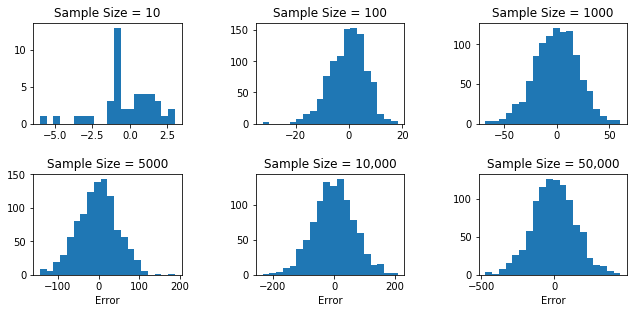

In [496]:
plot.figure()

plot.subplot(231) #calls the first plot in our 2 x 6 array of plots
plot.hist(Error4, 20) #prints histogram plot with 20 bins
plot.title('Sample Size = 10')

plot.subplot(232)
plot.hist(Error2, 20)
plot.title('Sample Size = 100')

plot.subplot(233)
plot.hist(Error1, 20)
plot.title('Sample Size = 1000')


plot.subplot(234)
plot.hist(Error3, 20)
plot.title('Sample Size = 5000')
plot.xlabel('Error')

plot.subplot(235)
plot.hist(Error5, 20)
plot.title('Sample Size = 10,000')
plot.xlabel('Error')

plot.subplot(236)
plot.hist(Error6, 20)
plot.title('Sample Size = 50,000')
plot.xlabel('Error')


plot.subplots_adjust(top = 1, right = 1.5, wspace = 0.5, hspace = 0.5) #adjusts the axes of the plots
# did this because they were meshing together

plot.show()

In [497]:
sigma1 = np.std(Error4) #np.std gives the standard deviation of a given array
sigma2 = np.std(Error2)
sigma3 = np.std(Error1)
sigma4 = np.std(Error3)
sigma5 = np.std(Error5)
sigma6 = np.std(Error6)

sigma = [sigma1, sigma2, sigma3, sigma4, sigma5, sigma6] #organizes our sigma values in an array to plot
samplesize = [10, 100, 1000, 5000, 10000, 50000] #x values to plot against to set the scale of the plot

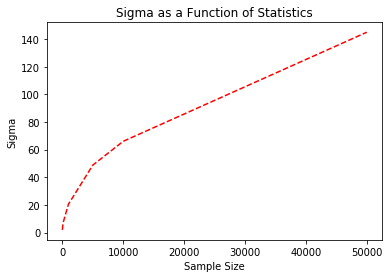

In [498]:
plot.plot(samplesize, sigma, '--r')
plot.title('Sigma as a Function of Statistics')
plot.xlabel('Sample Size')
plot.ylabel('Sigma')
plot.show()